<a href="https://colab.research.google.com/github/denniss83/Liderlik_Tarzlarinin_is_Tatmini_Uzerindeki_Etkisi_Donusumcu_ve_Etkilesimci_Liderlik_Karsilastirmasi/blob/main/Liderlik_Tarzlar%C4%B1n%C4%B1n_%C4%B0%C5%9F_Tatmini_%C3%9Czerindeki_Etkisi_D%C3%B6n%C3%BC%C5%9F%C3%BCmc%C3%BC_ve_Etkile%C5%9Fimci_Liderlik_Kar%C5%9F%C4%B1la%C5%9Ft%C4%B1rmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liderlik Tarzlarının İş Tatmini Üzerindeki Etkisi: Dönüşümcü ve Etkileşimci Liderlik Karşılaştırması

Bu çalışma, çalışanların algıladığı iki farklı liderlik tarzının — dönüşümcü (transformational) ve etkileşimci (transactional) — iş tatmini üzerindeki etkilerini analiz etmeyi amaçlamaktadır. Liderlik tarzlarının çalışan memnuniyetiyle nasıl ilişkilendiği ve hangisinin daha etkili olduğu istatistiksel analizlerle karşılaştırılmıştır.

>Bu çalışmada kullanılan veri, SPSS formatında (.sav) hazırlanmış özgün bir anket veri setidir. Veri, liderlik tarzlarının çalışan iş tatmini üzerindeki etkilerini analiz etmek amacıyla toplanmıştır. Veri kümesi doğrudan araştırmacı tarafından sağlanmış olup kamuya açık bir platformdan alınmamıştır.

>Veri Kümesindeki Ana Değişkenler:
>
>- Transformational_L: Çalışanların dönüşümcü liderlik algısı puanı
>
>- Transactional_L: Etkileşimci liderlik algısı puanı
>
>- Job_Satisfaction: İş tatmini puanı
>
>- Gender, Age, Education, Experience gibi demografik bilgiler
>
>Veriler, çalışanlardan alınan anket yanıtlarına dayanmaktadır ve tüm kişisel bilgilerden arındırılarak analiz için uygun hale getirilmiştir.



---

Bu çalışmada kullanılan veri, Onanuga et al. (2016) tarafından yürütülen alan araştırmasından alınmıştır.

Onanuga, P. A., Aminu, A., & Fatoki, O. I. (2016). Transformational and transactional leadership styles and employees’ job satisfaction in Nigerian Universities’ guesthouses. ScienceDirect. https://doi.org/10.1016/j.dib.2018.06.033



---



🔍 Araştırma Yöntemi Hakkında Bilgi;

Bu çalışmada, liderlik tarzlarının çalışan iş tatmini üzerindeki etkisini incelemek amacıyla anket tabanlı nicel bir araştırma yöntemi uygulanmıştır. Kullanılan veri, akademik bir çalışmada (Ohunakin et al., 2018) üniversite çalışanlarına uygulanmış ve kamuya açık şekilde paylaşılmış bir anket sonuçlarını içermektedir.

Araştırma kapsamında üç temel değişken grubu yer almaktadır:

[Dönüşümcü liderlik (Transformational Leadership)](https://en.wikipedia.org/wiki/Leadership#Leadership_styles)

[Etkileşimci liderlik (Transactional Leadership)](https://en.wikipedia.org/wiki/Leadership#Leadership_styles)

[Çalışan iş tatmini (Job Satisfaction)](https://en.wikipedia.org/wiki/Job_satisfaction)

>*(Detaylı bilgi almak isteyenler için kullanılan terimlere wikipedia üzerinden bağlantı linki oluşturulmuştur)*

Veri analizi süreci şu adımlarla gerçekleştirilmiştir:

Veri Temizliği ve Hazırlığı:
Anket verileri SPSS formatından ( .sav ) Python ortamına aktarılmış ve eksik ya da geçersiz kayıtlar temizlenmiştir.

Ölçek Puanlarının Hesaplanması:
Dönüşümcü ve etkileşimci liderlik ile iş tatmini düzeyini ölçmek için anketin ilgili soruları gruplanmış ve bu grupların ortalama puanları alınarak her katılımcının liderlik algısı ve tatmin düzeyi belirlenmiştir.

Tanımlayıcı İstatistikler:
Her değişkenin genel dağılımı, ortalama ve standart sapmaları incelenerek temel özet bilgiler elde edilmiştir.

❓ Hipotez Testleri:

- Bağımlı örneklem [t-testi](https://tr.wikipedia.org/wiki/Student%27in_t_testi) ile dönüşümcü ve etkileşimci liderlik algıları arasındaki fark test edilmiştir.

- [Regresyon analizi (OLS)](https://tr.wikipedia.org/wiki/Regresyon_analizi) ile liderlik tarzlarının iş tatmini üzerindeki etkisi sayısal olarak ölçülmüştür.

- [ANOVA](https://tr.wikipedia.org/wiki/Varyans_analizi) ile modelin anlamlılığı desteklenmiştir.



---



 # Gerekli Kütüphaneler

In [2]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 13.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat
from scipy import stats
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")



# Veri Yükleme ve İnceleme

>Veri Türü: Anket verisi (.sav formatında)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 1.sav to 1.sav


In [5]:
df, meta = pyreadstat.read_sav("1.sav")

df.head()

,Gender,Age,Marital,Education,TLS1,TLS2,TLS3,TLS4,TLS5,TLS6,...,WC,SA,OP,SS,JSc,IDI2,IM2,IS2,IC2,JSc2
0,1.0,2.0,1.0,4.0,6.0,6.0,6.0,2.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,4.8,5.2,4.4,6.0,3.4
1,2.0,1.0,1.0,4.0,6.0,6.0,6.0,5.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.8,4.6,4.8
2,2.0,2.0,2.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0,6.0
3,1.0,2.0,2.0,5.0,6.0,6.0,4.0,6.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,5.4,5.6,5.6,6.0,3.4
4,2.0,2.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,6.0,5.0,5.0,5.0,4.4


#Veri Temizleme ve Yeni Değişkenlerin Oluşturulması
>İş tatmini, dönüşümcü ve etkileşimci liderlik için ortalama puanlar hesaplanmış ve yeni sütunlar oluşturulmuştur.

>Ortalama alınarak her bir katılımcı için:Tek bir Transformational_L puanı,Tek bir Transactional_L puanı,Tek bir Job_Satisfaction puanı oluşur ve bu sayede istatistiksel modelleme (örneğin regresyon) yapılabilir.



In [6]:
print(df.columns.tolist())

missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0].head(15)

['Gender', 'Age', 'Marital', 'Education', 'TLS1', 'TLS2', 'TLS3', 'TLS4', 'TLS5', 'TLS6', 'TLS7', 'TLS8', 'TLS9', 'TLS10', 'TLS11', 'TLS12', 'TLS13', 'TLS14', 'TLS15', 'TLS16', 'TLS17', 'TLS18', 'TLS19', 'TLS20', 'TRLS21', 'TRLS22', 'TRLS23', 'TRLS24', 'TRLS25', 'TRLS26', 'TRLS27', 'TRLS28', 'TRLS29', 'TRLS30', 'TRLS31', 'TRLS32', 'TRLS33', 'TRLS34', 'TRLS35', 'JS36', 'JS37', 'JS38', 'JS39', 'JS40', 'JS41', 'JS42', 'JS43', 'JS44', 'JS45', 'JS46', 'JS47', 'JS48', 'JS49', 'JS50', 'JS51', 'JS52', 'JS53', 'JS54', 'JS55', 'JS56', 'JS57', 'JS58', 'JS59', 'JS60', 'IDI', 'IM', 'IS', 'IC', 'CR', 'MEA', 'MEP', 'WC', 'SA', 'OP', 'SS', 'JSc', 'IDI2', 'IM2', 'IS2', 'IC2', 'JSc2']


,0
JSc,1.0
WC,1.0
SS,1.0
SA,1.0
OP,1.0


In [7]:
df_clean = df.drop(columns=['WC', 'SA', 'OP', 'SS', 'JSc'])

print(f"Yeni sütun sayısı: {df_clean.shape[1]}")

df_clean.head()

Yeni sütun sayısı: 76


,Gender,Age,Marital,Education,TLS1,TLS2,TLS3,TLS4,TLS5,TLS6,...,IS,IC,CR,MEA,MEP,IDI2,IM2,IS2,IC2,JSc2
0,1.0,2.0,1.0,4.0,6.0,6.0,6.0,2.0,4.0,6.0,...,2.0,1.0,3.0,4.0,2.6,4.8,5.2,4.4,6.0,3.4
1,2.0,1.0,1.0,4.0,6.0,6.0,6.0,5.0,2.0,4.0,...,2.4,2.0,2.8,5.0,3.4,5.0,4.0,4.8,4.6,4.8
2,2.0,2.0,2.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,...,2.0,1.0,1.0,6.0,2.0,6.0,6.0,6.0,6.0,6.0
3,1.0,2.0,2.0,5.0,6.0,6.0,4.0,6.0,5.0,6.0,...,2.2,1.0,1.8,5.4,5.0,5.4,5.6,5.6,6.0,3.4
4,2.0,2.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,5.0,...,3.0,3.0,3.4,5.8,4.4,6.0,5.0,5.0,5.0,4.4


In [8]:
meta.column_labels

['Gender of Respondent',
 'Age of Respondent',
 'Marital status of Respondent',
 'Educational level of Respondent',
 'TLS1 of Respondent',
 'TLS2 of Respondent',
 'TLS3 of Respondent',
 'TLS4 of Respondent',
 'TLS5 of Respondent',
 'TLS6 of Respondent',
 'TLS7 of Respondent',
 'TLS8 of Respondent',
 'TLS9 of Respondent',
 'TLS10 of Respondent',
 'TLS11 of Respondent',
 'TLS12 of Respondent',
 'TLS13 of Respondent',
 'TLS14 of Respondent',
 'TLS15 of Respondent',
 'TLS16 of Respondent',
 'TLS17 of Respondent',
 'TLS18 of Respondent',
 'TLS19 of Respondent',
 'TLS20 of Respondent',
 'TRLS21 of Respondent',
 'TRLS22 of Respondent',
 'TRLS23 of Respondent',
 'TRLS24 of Respondent',
 'TRLS25 of Respondent',
 'TRLS26 of Respondent',
 'TRLS27 of Respondent',
 'TRLS28 of Respondent',
 'TRLS29 of Respondent',
 'TRLS30 of Respondent',
 'TRLS31 of Respondent',
 'TRLS32 of Respondent',
 'TRLS33 of Respondent',
 'TRLS34 of Respondent',
 'TRLS35 of Respondent',
 'JS36 of Respondent',
 'JS37 of Respo

In [9]:
df_clean = df.dropna(axis=1, how='all')
print(f"Yeni sütun sayısı: {df_clean.shape[1]}")

Yeni sütun sayısı: 76


In [10]:
df_clean['Transformational_L'] = df_clean.loc[:, 'TLS1':'TLS20'].mean(axis=1)
df_clean['Transactional_L'] = df_clean.loc[:, 'TRLS21':'TRLS35'].mean(axis=1)
df_clean['Job_Satisfaction'] = df_clean.loc[:, 'JS36':'JS60'].mean(axis=1)

df_clean[['Transformational_L', 'Transactional_L', 'Job_Satisfaction']].head()

,Transformational_L,Transactional_L,Job_Satisfaction
0,5.10,3.133333,3.52
1,4.60,3.466667,3.96
2,6.00,6.000000,6.00
3,5.65,2.800000,4.04
4,5.25,2.866667,4.28


# Korelasyon Analizi

>Üç temel değişken (Transformational, Transactional ve Job Satisfaction) arasındaki ilişkiler korelasyon matrisi ile analiz edilmiştir.

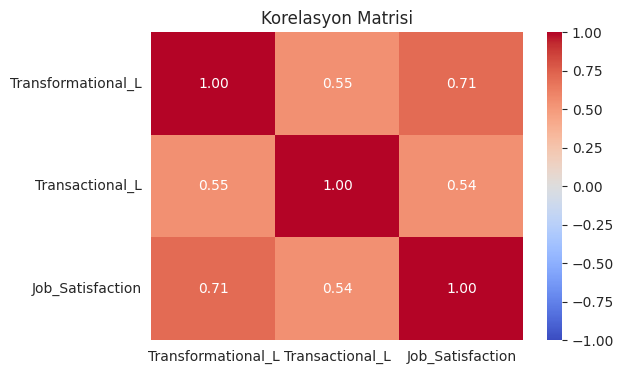

In [11]:
corr_matrix = df_clean[['Transformational_L', 'Transactional_L', 'Job_Satisfaction']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

| Değişkenler                                 | Korelasyon Değeri | Yorum                                                                                                                                                                                 |
| ------------------------------------------- | ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Transformational\_L ↔ Job\_Satisfaction** | **0.71**          | Dönüşümcü liderlik ile iş tatmini arasında **güçlü bir pozitif ilişki** var. Yani çalışanlar, dönüşümcü liderlik tarzında yönetildiklerinde işlerinden **daha çok memnun** oluyorlar. |
| **Transactional\_L ↔ Job\_Satisfaction**    | **0.54**          | Etkileşimci liderlik ile iş tatmini arasında **orta düzeyde pozitif ilişki** var. Bu tarz da iş tatminini artırıyor, ama dönüşümcü liderlik kadar etkili değil.                       |
| **Transformational\_L ↔ Transactional\_L**  | **0.55**          | Bu iki liderlik tarzı arasında **orta düzeyde ilişki** var. Bu da bazı liderlerin her iki tarzı da birlikte kullanabildiğini gösterebilir.                                            |


# Regresyon Analizi (statsmodels ile)

>Liderlik tarzlarının iş tatmini üzerindeki etkisini ölçmek için çoklu doğrusal regresyon modeli oluşturulmuştur.

In [12]:
y = df_clean['Job_Satisfaction']

X = df_clean[['Transformational_L', 'Transactional_L']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Job_Satisfaction   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     188.0
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           9.16e-55
Time:                        06:58:56   Log-Likelihood:                -350.69
No. Observations:                 324   AIC:                             707.4
Df Residuals:                     321   BIC:                             718.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5834      0

## Hata Dağılım Grafiği (Residual Plot)

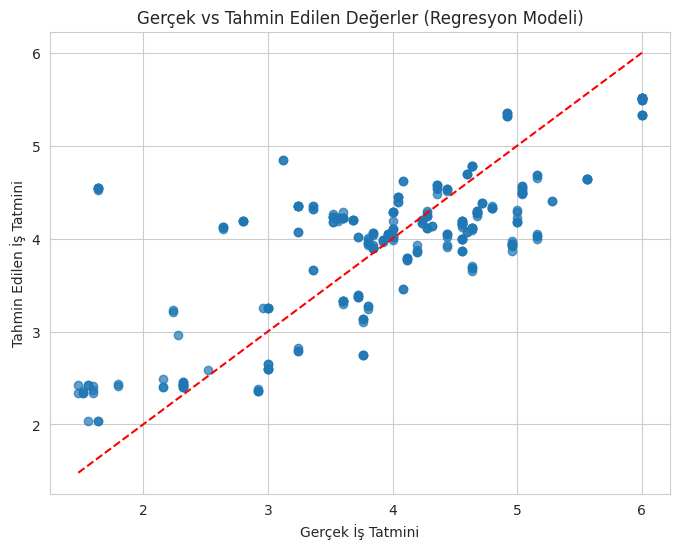

In [13]:
y_true = df_clean['Job_Satisfaction']
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('Gerçek İş Tatmini')
plt.ylabel('Tahmin Edilen İş Tatmini')
plt.title('Gerçek vs Tahmin Edilen Değerler (Regresyon Modeli)')
plt.grid(True)
plt.show()

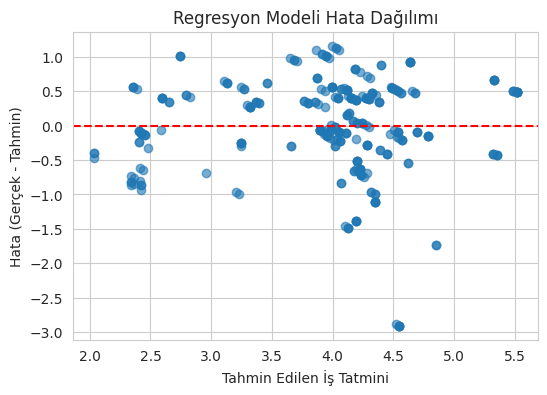

In [14]:
residuals = y_true - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Tahmin Edilen İş Tatmini")
plt.ylabel("Hata (Gerçek - Tahmin)")
plt.title("Regresyon Modeli Hata Dağılımı")
plt.grid(True)
plt.show()

## Hata Histogramı:

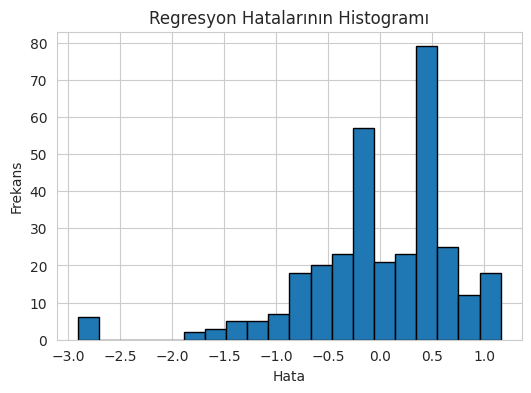

In [15]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Regresyon Hatalarının Histogramı")
plt.xlabel("Hata")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

## Q-Q Plot (Hataların Normalliği)

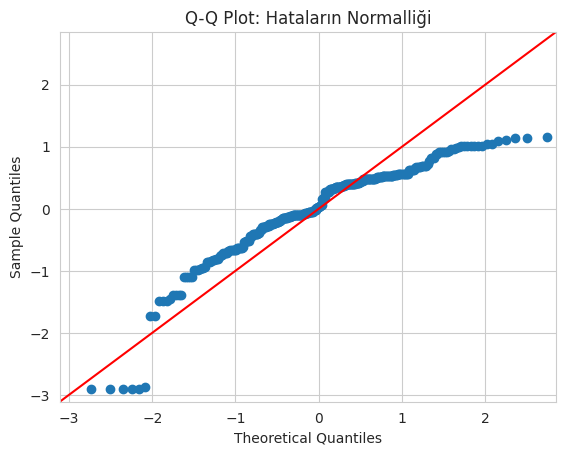

In [16]:
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot: Hataların Normalliği")
plt.show()

>Noktaların önemli bir kısmı kırmızı referans doğrusu etrafında sıralanmıştır.
>
>Bu durum, hataların yaklaşık olarak normal dağıldığını gösterir.
>
>Aşırı uçlardaki sapmalar modelin her koşulda mükemmel tahmin yapamadığını gösterse de, genel olarak model geçerliliğini korumaktadır.

>Hem dönüşümcü hem de etkileşimci liderlik tarzları çalışanların iş tatminini artırmaktadır.
>
>Ancak dönüşümcü liderliğin etkisi daha güçlüdür.
>
>İşletmelerin çalışan memnuniyetini artırmak için vizyoner, ilham verici ve destekleyici liderlik yaklaşımlarını teşvik etmesi önerilir.

# Demografik Değişkenlere Göre İş Tatmini

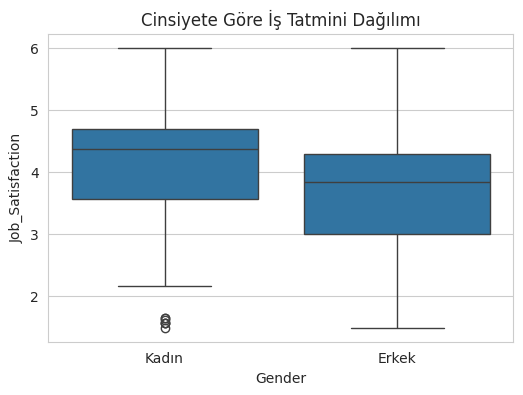

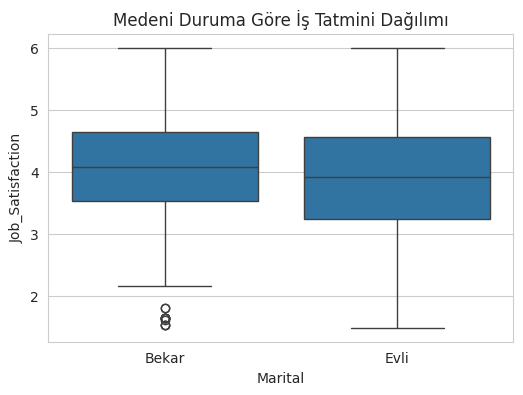

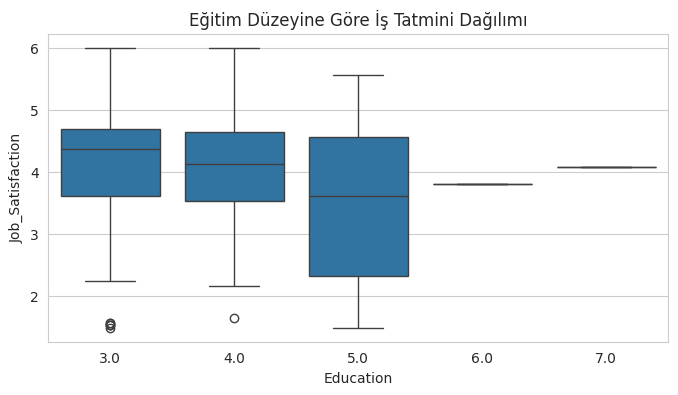

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Job_Satisfaction', data=df_clean)
plt.title("Cinsiyete Göre İş Tatmini Dağılımı")
plt.xticks([0, 1], ['Kadın', 'Erkek'])
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Marital', y='Job_Satisfaction', data=df_clean)
plt.title("Medeni Duruma Göre İş Tatmini Dağılımı")
plt.xticks([0, 1], ['Bekar', 'Evli'])
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Education', y='Job_Satisfaction', data=df_clean)
plt.title("Eğitim Düzeyine Göre İş Tatmini Dağılımı")
plt.show()

>Cinsiyete Göre İş Tatmini;
>
>- Kadın ve erkek çalışanların iş tatmini dağılımı benzer.
>
>- Ortalamalar birbirine yakın olsa da kadınlarda üst sınır biraz daha yüksek gözüküyor.
>
>- Aykırı değerler (outlier) genelde kadın grubunda daha fazla.
>
>Medeni Duruma Göre İş Tatmini;
>
>- Evli ve bekar çalışanların iş tatmini düzeyleri arasında belirgin bir fark yok.
>
>- Dağılımlar ve medyan değerler oldukça benzer.
>
>Eğitim Düzeyine Göre İş Tatmini;
>
>- Eğitim düzeyi arttıkça iş tatmini önce artıyor gibi görünse de, özellikle 5. seviyeden sonra bir dalgalanma oluşuyor.
>
>- 6 ve 7. seviyelerde daha istikrarlı (ve ortalamanın biraz üstünde) bir iş tatmini gözlemleniyor.
>
>- Bu durum, yüksek lisans/doktora seviyesinde çalışanların tatmin düzeyinin daha dengeli olduğunu gösterebilir.

 # ANOVA Analizi (Eğitim Düzeyi Etkisi)

 >Eğitim düzeyi gruplarının iş tatmini düzeyleri arasında istatistiksel fark olup olmadığı tek yönlü ANOVA testiyle analiz edilmiştir.

In [18]:
from scipy.stats import f_oneway

groups = [group['Job_Satisfaction'].values for name, group in df_clean.groupby('Education')]

f_stat, p_val = f_oneway(*groups)

print("ANOVA F istatistiği:", round(f_stat, 3))
print("p-değeri:", round(p_val, 4))

ANOVA F istatistiği: 6.988
p-değeri: 0.0


>Eğitim düzeyine göre iş tatmini düzeyleri arasında istatistiksel olarak anlamlı fark vardır. Yani bireylerin eğitim seviyesi arttıkça veya azaldıkça iş tatmin düzeyleri değişmektedir.

# Liderlik Tarzlarının Karşılaştırılması (T-Testi)

>Dönüşümcü ve etkileşimci liderlik algısı puanları eşleştirilmiş örneklem t-testi ile karşılaştırılmıştır.

In [19]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(df_clean['Transformational_L'], df_clean['Transactional_L'])

print(f"t-istatistiği: {t_stat:.3f}")
print(f"p-değeri: {p_val:.4f}")

t-istatistiği: 18.016
p-değeri: 0.0000


In [20]:
print("Transformational_L Ortalama:", df_clean['Transformational_L'].mean())
print("Transactional_L Ortalama:", df_clean['Transactional_L'].mean())

Transformational_L Ortalama: 4.433333333333334
Transactional_L Ortalama: 3.454115226337448


>Yorum:
>
>- p-değeri < 0.05 olduğu için, istatistiksel olarak anlamlı bir fark vardır.
>
>- Katılımcılar dönüşümcü liderliği (Transformational_L), etkileşimci liderliğe (Transactional_L) kıyasla önemli ölçüde daha yüksek puanlamış.
>
>- Bu sonuç, dönüşümcü liderliğin çalışanlar tarafından daha olumlu algılandığını veya daha etkili bulunduğunu gösterir.

In [24]:
df['Transformational_L'] = df[[f'TLS{i}' for i in range(1, 21)]].mean(axis=1)
df['Transactional_L'] = df[[f'TRLS{i}' for i in range(21, 36)]].mean(axis=1)
df['Job_Satisfaction'] = df[[f'JS{i}' for i in range(36, 61)]].mean(axis=1)

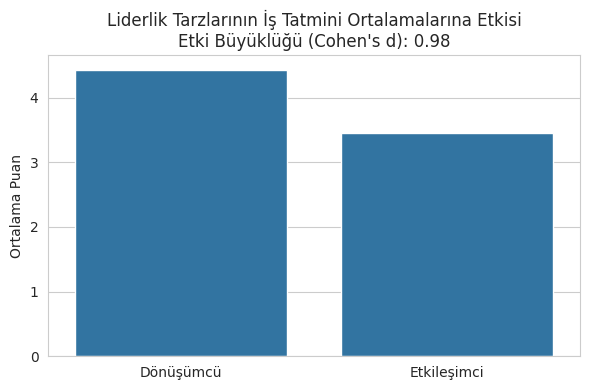

In [25]:
transformational_mean = df['Transformational_L'].mean()
transactional_mean = df['Transactional_L'].mean()

transformational_std = df['Transformational_L'].std()
transactional_std = df['Transactional_L'].std()

cohen_d = (transformational_mean - transactional_mean) / np.sqrt((transformational_std**2 + transactional_std**2) / 2)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Dönüşümcü", "Etkileşimci"], y=[transformational_mean, transactional_mean])
plt.title(f"Liderlik Tarzlarının İş Tatmini Ortalamalarına Etkisi\nEtki Büyüklüğü (Cohen's d): {cohen_d:.2f}")
plt.ylabel("Ortalama Puan")
plt.tight_layout()
plt.show()

>Bu grafikte dönüşümcü ve etkileşimci liderlik tarzlarının çalışan iş tatmini üzerindeki etkisi karşılaştırılmıştır. Ortalama puanlar açısından dönüşümcü liderlik tarzı daha yüksek bir iş tatmini ile ilişkilidir. Cohen’s d değeri 0.98 olup, bu farkın büyük bir etki büyüklüğüne karşılık geldiğini göstermektedir. Bu sonuç, dönüşümcü liderlik tarzının çalışanların iş tatminini artırma konusunda daha etkili olduğunu göstermektedir.

# 💡 Temel Bulgular

>Bu çalışmada elde edilen bulgular, Ohunakin et al. (2018) tarafından yapılan ampirik araştırmayla örtüşmektedir. Her iki çalışmada da dönüşümcü liderliğin, çalışan iş tatmini üzerinde daha güçlü ve anlamlı bir etkisi olduğu sonucuna ulaşılmıştır.

🔹 Dönüşümcü liderlik, iş tatminini daha fazla artıran liderlik türüdür.

🔹 Katılımcılar dönüşümcü liderliği anlamlı şekilde daha olumlu değerlendirmiştir (t-testi).

🔹 Eğitim düzeyine göre iş tatmininde istatistiksel olarak anlamlı farklılıklar vardır (ANOVA, p < 0.05).

🔹 Cinsiyet ve medeni durum açısından iş tatmini dağılımları benzer çıkmıştır.



---


>Bu çalışma yalnızca teknik bir veri analizi projesi değildir. Aynı zamanda, tarafımdan yüksek lisans eğitimim kapsamında yürütülmüş olan "Dönüşümcü Liderliğin İşletme Kârlılığına Etkisi" başlıklı bitirme projemin bir devamı niteliğindedir.
>
>Yüksek lisans sürecimde sınırlı zaman ve kaynak nedeniyle ampirik (veriye dayalı) analiz gerçekleştirme imkânım olmamıştı. Ancak bu proje ile, dönüşümcü ve etkileşimci liderlik tarzlarının çalışan iş tatmini üzerindeki etkisi veri destekli biçimde analiz edilmiştir.
>
>Çalışma, hem kişisel merakımı derinleştirme hem de daha önceki akademik araştırmamı nicel verilere dayalı hale getirme amacıyla hazırlanmıştır.
>
>Sonuçlar, dönüşümcü liderliğin yalnızca çalışan tatmini değil, dolaylı olarak işletme verimliliği ve uzun vadeli kârlılığı da olumlu yönde etkileyebileceği fikrini destekler niteliktedir.


---


